In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy 

In [2]:
df = pd.read_csv('DatosPrueba.csv', delimiter=';')
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,"45,0",Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,"46,2306","-112,1138",1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,"47,034331","-112,561071",0
1,2019-01-01 00:06:23,4642894980163,fraud_Rutherford-Mertz,grocery_pos,"24,74",Eddie,Mendez,M,1831 Faith View Suite 653,Clarinda,...,"40,7491","-95,038",7297,IT trainer,1990-07-13,d71c95ab6b7356dd74389d41df429c87,1325376383,"40,275891","-96,011548",0
2,2019-01-01 00:21:32,4334230547694630,fraud_Bruen-Yost,misc_pos,"6,85",Scott,Martin,M,7483 Navarro Flats,Freedom,...,"43,0172","-111,0292",471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,1325377292,"43,753735","-111,454923",0
3,2019-01-01 00:22:44,630412733309,fraud_Torphy-Goyette,shopping_pos,"66,21",Heather,Stanton,F,445 Jerry Lights Apt. 081,Republic,...,"46,368","-87,9938",1038,Armed forces training and education officer,1964-04-22,20f048d3907dbb9978e23bee7b7578ce,1325377364,"46,412038","-88,516663",0
4,2019-01-01 00:23:58,374125201044065,"fraud_Bahringer, Schoen and Corkery",shopping_pos,"9,03",Christopher,Gilbert,M,20937 Reed Lakes Apt. 271,Washington,...,"38,9757","-77,0282",601723,"Optician, dispensing",1970-07-20,c733711c521c41c578f4a964d8350df0,1325377438,"38,880898","-76,44111600000002",0


In [3]:
# Replace commas with dots and convert to float
df['amt'] = df['amt'].str.replace(',', '.').astype(float)
df['lat'] = df['lat'].str.replace(',', '.').astype(float)
df['long'] = df['long'].str.replace(',', '.').astype(float)
df['merch_lat'] = df['merch_lat'].str.replace(',', '.').astype(float)
df['merch_long'] = df['merch_long'].str.replace(',', '.').astype(float)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200881 entries, 0 to 200880
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  200881 non-null  object 
 1   cc_num                 200881 non-null  int64  
 2   merchant               200881 non-null  object 
 3   category               200881 non-null  object 
 4   amt                    200881 non-null  float64
 5   first                  200881 non-null  object 
 6   last                   200881 non-null  object 
 7   gender                 200881 non-null  object 
 8   street                 200881 non-null  object 
 9   city                   200881 non-null  object 
 10  state                  200881 non-null  object 
 11  zip                    200881 non-null  int64  
 12  lat                    200881 non-null  float64
 13  long                   200881 non-null  float64
 14  city_pop               200881 non-nu

In [5]:
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,2.008810e+05,200881.000000,200881.000000,200881.000000,200881.000000,2.008810e+05,2.008810e+05,200881.000000,200881.000000,200881.000000
mean,4.156141e+17,85.128618,48826.911331,38.545014,-90.242478,8.920038e+04,1.349255e+09,38.545281,-90.241478,0.037365
std,1.306632e+18,180.409147,26914.330746,5.090472,13.794411,3.019086e+05,1.287819e+07,5.124502,13.805559,0.189656
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.033288,-166.671242,0.000000
25%,1.800429e+14,9.840000,26237.000000,34.668900,-96.809400,7.430000e+02,1.338724e+09,34.751817,-96.926922,0.000000
50%,3.521417e+15,48.860000,48174.000000,39.354300,-87.476900,2.456000e+03,1.349299e+09,39.352830,-87.453214,0.000000
75%,4.642255e+15,86.650000,72042.000000,41.948800,-80.175200,2.032800e+04,1.359589e+09,41.964456,-80.249053,0.000000
max,4.992346e+18,14467.640000,99783.000000,66.693300,-67.950300,2.906700e+06,1.371817e+09,67.510267,-66.958751,1.000000


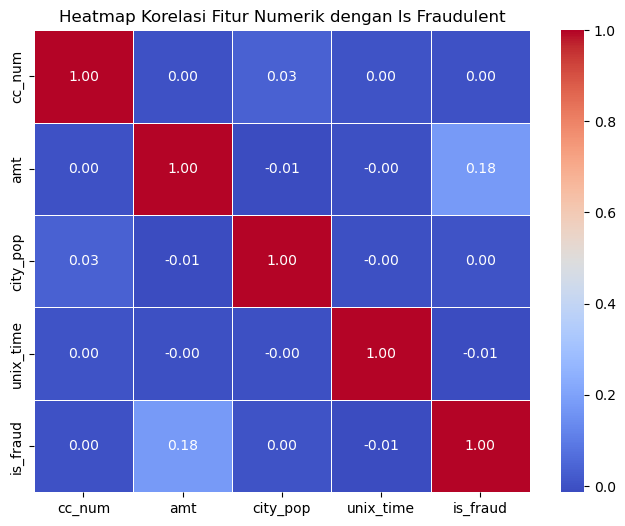

In [8]:

# Pilih kolom numerik + target
num_cols = ['cc_num', 'amt', 'city_pop', 'unix_time']
corr_matrix = df[num_cols + ['is_fraud']].corr(method='kendall')

# Visualisasi semua korelasi dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Fitur Numerik dengan Is Fraudulent')
plt.show()


### Insight dari Heatmap Korelasi

Berdasarkan heatmap korelasi di atas, berikut adalah beberapa insight yang dapat diambil:

1. **Korelasi antara `cc_num` dan `is_fraud`**:
    - Nilai korelasi sebesar **0.000882**, yang menunjukkan bahwa hubungan antara nomor kartu kredit (`cc_num`) dan target (`is_fraud`) sangat lemah atau hampir tidak ada korelasi.

2. **Korelasi antara `amt` (jumlah transaksi) dan `is_fraud`**:
    - Nilai korelasi sebesar **0.179426**, yang menunjukkan adanya korelasi positif lemah. Artinya, semakin besar jumlah transaksi, kemungkinan terjadinya fraud sedikit meningkat.

3. **Korelasi antara `city_pop` (populasi kota) dan `is_fraud`**:
    - Nilai korelasi sebesar **0.002770**, yang menunjukkan hubungan yang sangat lemah antara populasi kota dan kejadian fraud.

4. **Korelasi antara `unix_time` (waktu transaksi) dan `is_fraud`**:
    - Nilai korelasi sebesar **-0.010176**, yang menunjukkan hubungan negatif yang sangat lemah. Artinya, waktu transaksi hampir tidak memengaruhi kejadian fraud.


In [9]:
from scipy.stats import chi2_contingency

# Fungsi Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k)-1)))

# cat columns merupakan kolom yang bukan anggota num_cols
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Hitung Cramer's V untuk setiap kolom kategorikal terhadap target
cramers_result = {}
for col in cat_cols:
    cramers_result[col] = cramers_v(df[col], df['is_fraud'])

# Ubah jadi DataFrame biar rapi
cramers_df = pd.DataFrame.from_dict(cramers_result, orient='index', columns=['Cramer\'s V']).sort_values(by="Cramer's V", ascending=False)
print(cramers_df)


                       Cramer's V
trans_num                1.000000
trans_date_trans_time    0.998788
street                   0.350966
dob                      0.347899
city                     0.318049
job                      0.208270
last                     0.196292
first                    0.181021
merchant                 0.180191
category                 0.173989
state                    0.051480
gender                   0.019010


In [ ]:
# Uji hipotesis chi-square untuk semua kolom kategori terhadap is_fraud
chi2_results = {}
for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df['is_fraud'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results[col] = {'Chi2': chi2, 'p-value': p, 'Degrees of Freedom': dof}

# Ubah hasil menjadi DataFrame untuk visualisasi
chi2_df = pd.DataFrame.from_dict(chi2_results, orient='index')
chi2_df.sort_values(by='p-value', inplace=True)
chi2_df

,Chi2,p-value,Degrees of Freedom
merchant,6522.364043,0.000000e+00,692
category,6081.087234,0.000000e+00,13
first,6582.616277,0.000000e+00,351
last,7740.062728,0.000000e+00,480
city,20320.162307,0.000000e+00,893
street,24743.936358,0.000000e+00,982
dob,24313.443315,0.000000e+00,967
job,8713.502090,0.000000e+00,493
state,532.370674,7.075394e-82,50
gender,72.594779,1.591997e-17,1


In [12]:
# Tingkat signifikansi
alpha = 0.05

# Evaluasi apakah hipotesis null ditolak atau tidak
chi2_df['Reject Null Hypothesis'] = chi2_df['p-value'] < alpha
chi2_df

,Chi2,p-value,Degrees of Freedom,Reject Null Hypothesis
merchant,6522.364043,0.000000e+00,692,True
category,6081.087234,0.000000e+00,13,True
first,6582.616277,0.000000e+00,351,True
last,7740.062728,0.000000e+00,480,True
city,20320.162307,0.000000e+00,893,True
street,24743.936358,0.000000e+00,982,True
dob,24313.443315,0.000000e+00,967,True
job,8713.502090,0.000000e+00,493,True
state,532.370674,7.075394e-82,50,True
gender,72.594779,1.591997e-17,1,True


C:\Users\Dionisius\AppData\Local\Temp\ipykernel_23532\3100984472.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cramers_df['Cramer\'s V'], y=cramers_df.index, palette='coolwarm')


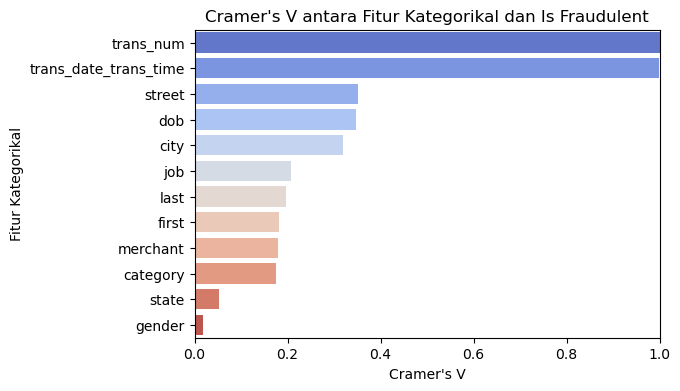

In [11]:
plt.figure(figsize=(6, 4))
sns.barplot(x=cramers_df['Cramer\'s V'], y=cramers_df.index, palette='coolwarm')
plt.title("Cramer's V antara Fitur Kategorikal dan Is Fraudulent")
plt.xlabel("Cramer's V")
plt.ylabel("Fitur Kategorikal")
plt.xlim(0, 1)
plt.show()


In [14]:
df['merchant'].unique()

array(['fraud_Kutch, Hermiston and Farrell', 'fraud_Rutherford-Mertz',
       'fraud_Bruen-Yost', 'fraud_Torphy-Goyette',
       'fraud_Bahringer, Schoen and Corkery', 'fraud_Howe Ltd',
       'fraud_Koepp-Witting', 'fraud_Mosciski, Ziemann and Farrell',
       'fraud_Huel-Langworth', 'fraud_Macejkovic-Lesch',
       'fraud_Reichert, Huels and Hoppe', 'fraud_Wolf Inc',
       'fraud_Jaskolski-Dibbert', 'fraud_Schmeler Inc',
       'fraud_Weber and Sons', 'fraud_Rau and Sons',
       'fraud_Swaniawski, Lowe and Robel', "fraud_Pacocha-O'Reilly",
       'fraud_Boyer PLC', 'fraud_Metz-Boehm', 'fraud_Koepp-Parker',
       'fraud_Quitzon, Green and Bashirian', 'fraud_Rodriguez Group',
       'fraud_Buckridge PLC', 'fraud_Kilback LLC', 'fraud_Price Inc',
       'fraud_Johnston, Nikolaus and Maggio', 'fraud_McCullough LLC',
       'fraud_Schmitt Ltd', 'fraud_Lockman, West and Runte',
       "fraud_Deckow-O'Conner", 'fraud_Hills-Olson',
       'fraud_Rohan, White and Aufderhar',
       'fraud_C

### Insight dari Tabel Kategori

Berdasarkan tabel kategori di atas, berikut adalah beberapa insight yang dapat diambil:

1. **Kolom `trans_num`**:
    - Memiliki nilai **Cramer's V sebesar 1.0**, yang menunjukkan korelasi yang sangat tinggi dengan target (`is_fraud`). Hal ini mengindikasikan bahwa setiap transaksi memiliki nomor unik yang dapat secara langsung mengidentifikasi kejadian fraud.

2. **Kolom `trans_date_trans_time`**:
    - Memiliki nilai **Cramer's V sebesar 0.9988**, yang juga menunjukkan korelasi yang sangat tinggi dengan target. Waktu transaksi dapat menjadi indikator penting dalam mendeteksi pola fraud.

3. **Kolom `street` dan `dob`**:
    - Memiliki nilai **Cramer's V masing-masing sebesar 0.3510 dan 0.3479**, yang menunjukkan korelasi sedang dengan target. Informasi alamat dan tanggal lahir mungkin memberikan petunjuk tambahan terkait pola fraud.

4. **Kolom `merchant` dan `category`**:
    - Memiliki nilai **Cramer's V sebesar 0.1802 dan 0.1740**, yang menunjukkan korelasi lemah dengan target. Namun, kategori produk dan merchant tertentu mungkin lebih rentan terhadap kejadian fraud.

5. **Kolom `gender` dan `state`**:
    - Memiliki nilai **Cramer's V sebesar 0.0190 dan 0.0515**, yang menunjukkan korelasi yang sangat lemah dengan target. Hal ini mengindikasikan bahwa jenis kelamin dan lokasi negara bagian tidak terlalu berpengaruh terhadap kejadian fraud.

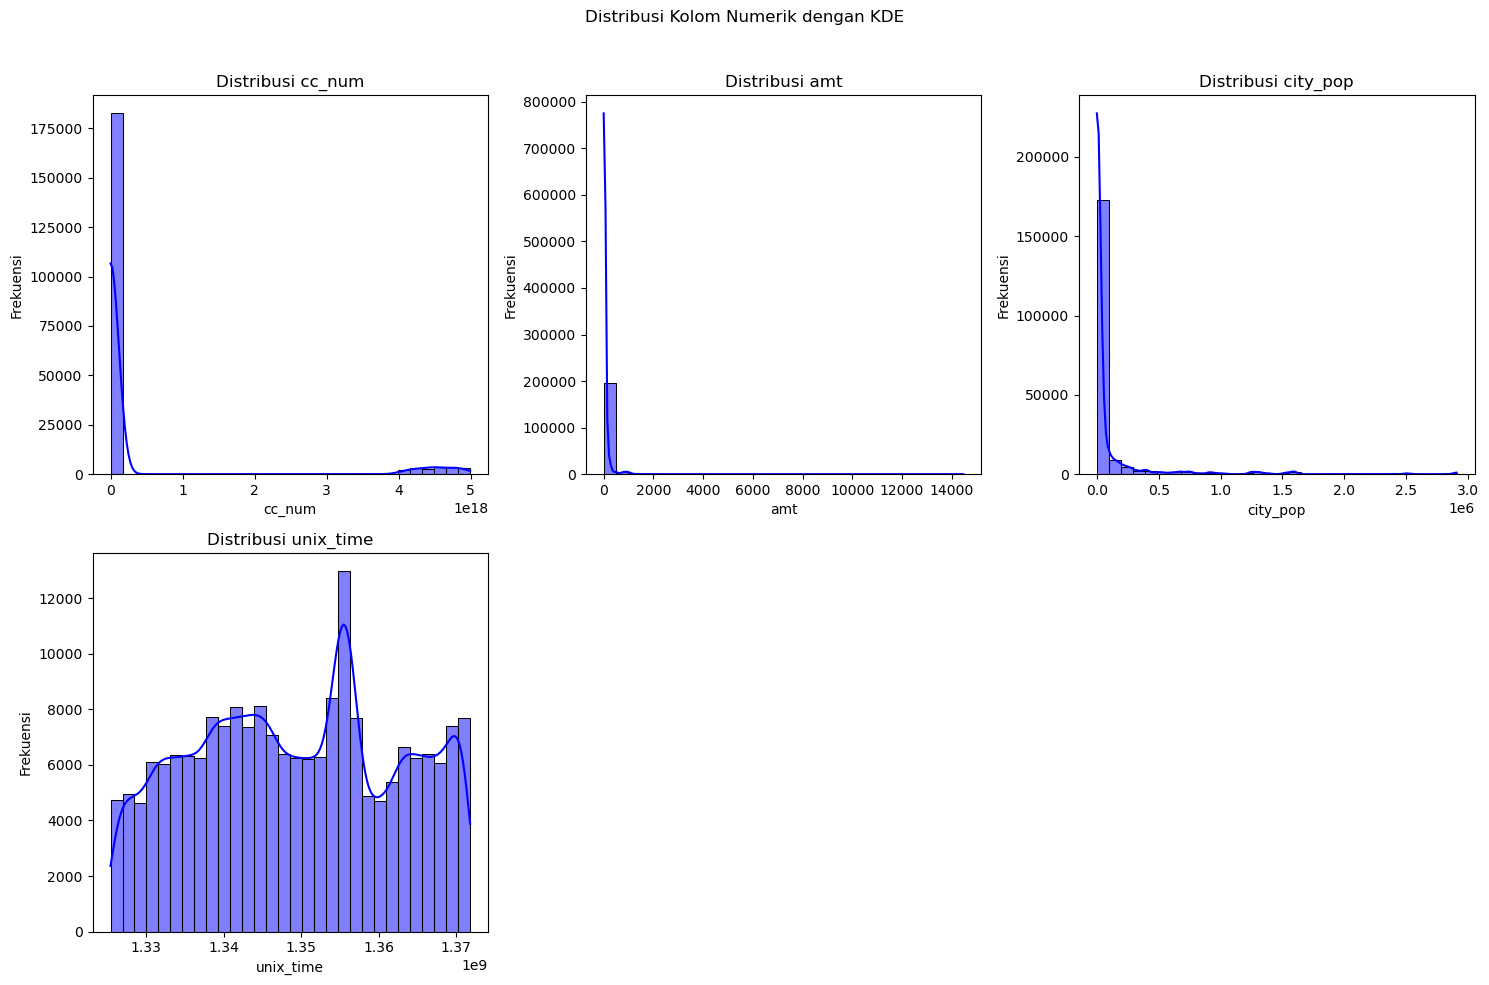

In [12]:
# Plot histogram dengan KDE untuk melihat skewness
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
plt.suptitle("Distribusi Kolom Numerik dengan KDE")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Insight dari Distribusi Data

Berdasarkan distribusi data yang diberikan, berikut adalah beberapa insight yang dapat diambil:

1. **Kolom `amt` (Jumlah Transaksi)**:
    - Distribusi data menunjukkan bahwa sebagian besar transaksi memiliki jumlah yang kecil, dengan beberapa outlier pada jumlah transaksi yang besar. Hal ini mengindikasikan bahwa transaksi dengan jumlah besar mungkin lebih jarang terjadi.

2. **Kolom `lat` dan `long` (Koordinat Lokasi)**:
    - Data lokasi menunjukkan distribusi yang cukup merata, mencakup berbagai wilayah geografis. Namun, beberapa lokasi mungkin lebih sering muncul, tergantung pada konsentrasi populasi atau aktivitas transaksi.

3. **Kolom `city_pop` (Populasi Kota)**:
    - Sebagian besar transaksi terjadi di kota-kota dengan populasi kecil hingga menengah. Kota dengan populasi besar mungkin memiliki lebih banyak transaksi, tetapi distribusinya lebih tersebar.

4. **Kolom `merch_lat` dan `merch_long` (Koordinat Lokasi Merchant)**:
    - Lokasi merchant juga menunjukkan distribusi yang luas, mencerminkan keberadaan merchant di berbagai wilayah. Beberapa merchant mungkin lebih sering muncul, terutama di area dengan aktivitas ekonomi tinggi.

5. **Kolom `is_fraud` (Indikator Fraud)**:
    - Distribusi data menunjukkan bahwa kasus fraud relatif jarang dibandingkan dengan transaksi normal. Hal ini sesuai dengan sifat data fraud yang biasanya imbalanced.

6. **Kolom `hour` (Jam Transaksi)**:
    - Distribusi jam transaksi menunjukkan pola tertentu, seperti puncak aktivitas pada jam-jam tertentu. Hal ini dapat memberikan wawasan tentang waktu-waktu yang lebih rawan terhadap fraud.

7. **Kolom `job` (Pekerjaan)**:
    - Beberapa pekerjaan, seperti "Materials engineer" dan "Trading standards officer," memiliki jumlah transaksi fraud yang lebih tinggi. Hal ini dapat memberikan indikasi tentang kelompok pekerjaan yang lebih rentan terhadap fraud.

8. **Kolom `merchant` (Merchant)**:
    - Merchant tertentu, seperti "fraud_Rau and Sons" dan "fraud_Cormier LLC," memiliki jumlah kasus fraud yang lebih tinggi. Hal ini menunjukkan bahwa merchant-merchant ini mungkin lebih sering menjadi target fraud atau memiliki kelemahan dalam sistem keamanan mereka.

9. **Kolom `cc_num` (Nomor Kartu Kredit)**:
    - Beberapa nomor kartu kredit, seperti "4792627764422477317," memiliki jumlah transaksi yang sangat tinggi. Hal ini dapat mengindikasikan potensi penyalahgunaan atau aktivitas yang mencurigakan pada kartu tersebut.

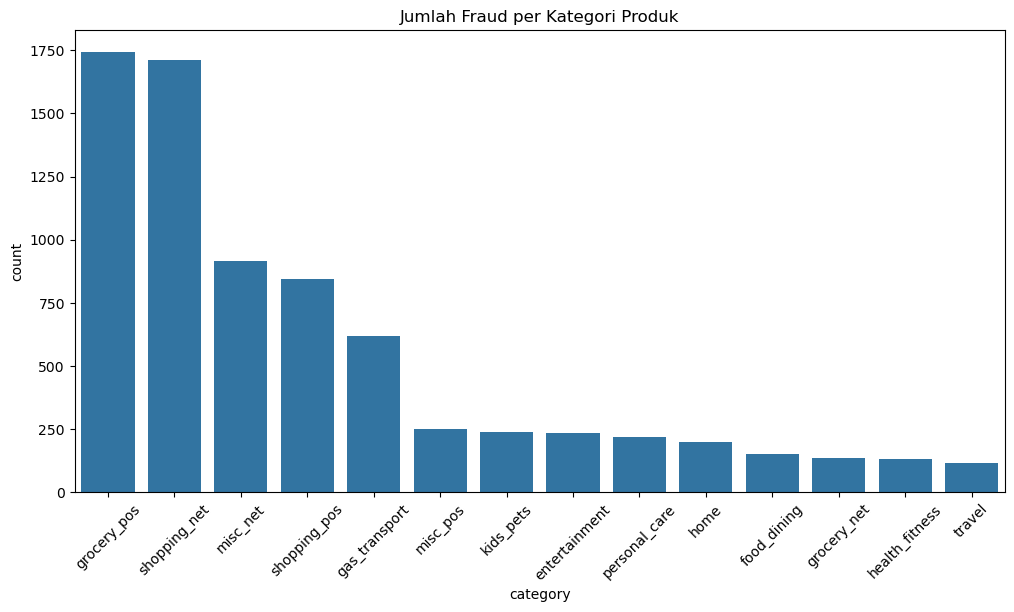

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(data=df[df['is_fraud'] == 1], x='category', order=df[df['is_fraud'] == 1]['category'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Jumlah Fraud per Kategori Produk')
plt.show()


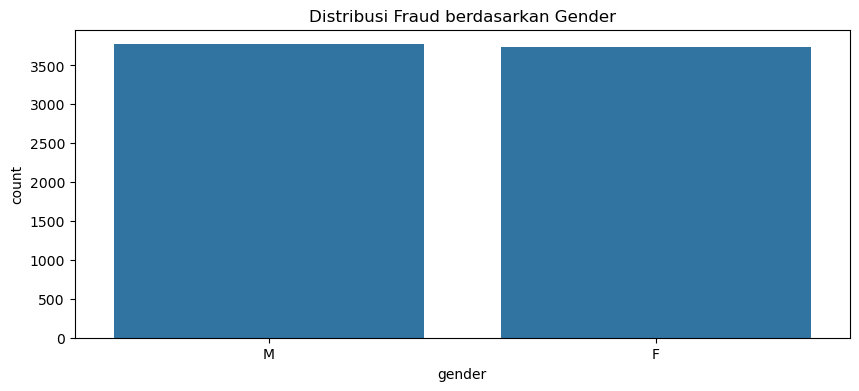

In [14]:
plt.figure(figsize=(10,4))
sns.countplot(data=df[df['is_fraud'] == 1], x='gender')
plt.title('Distribusi Fraud berdasarkan Gender')
plt.show()


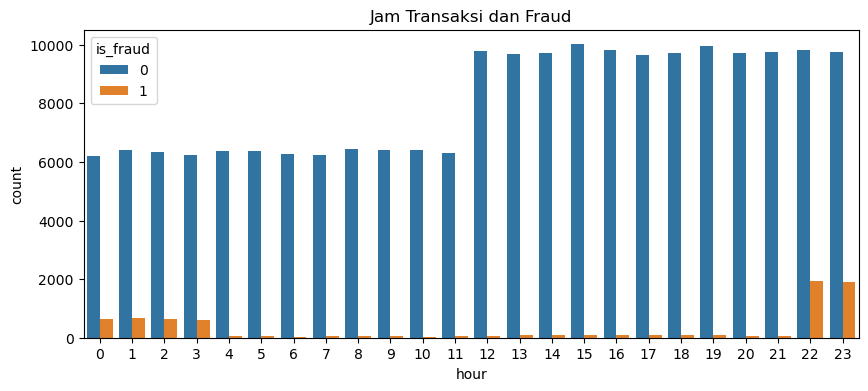

In [15]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour

plt.figure(figsize=(10,4))
sns.countplot(x='hour', hue='is_fraud', data=df)
plt.title('Jam Transaksi dan Fraud')
plt.show()


Berikut adalah insight dari visualisasi distribusi jam transaksi dan fraud:
1. **Fraud Berdasarkan Jam Transaksi**:
    - Fraud cenderung terjadi pada jam-jam tertentu, yang mungkin menunjukkan pola atau celah keamanan yang dimanfaatkan oleh pelaku fraud.
    - Misalnya, jika fraud lebih sering terjadi pada malam hari, hal ini dapat mengindikasikan bahwa pelaku memanfaatkan waktu ketika pengawasan lebih lemah.

3. **Rekomendasi**:
    - Perkuat pengawasan dan sistem deteksi fraud pada jam-jam rawan.
    - Gunakan model prediktif yang mempertimbangkan waktu transaksi sebagai salah satu fitur penting untuk mendeteksi potensi fraud.


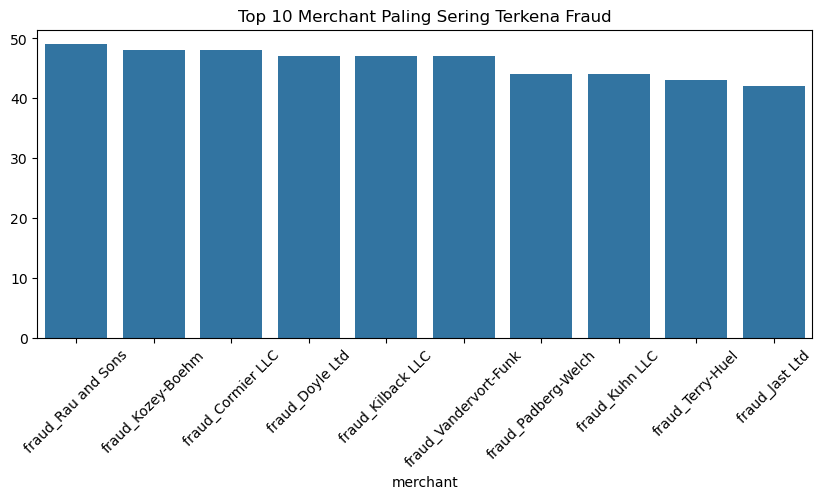

In [17]:
fraud_merchants = df[df['is_fraud'] == 1]['merchant'].value_counts().head(10)
plt.figure(figsize=(10,4))
sns.barplot(x=fraud_merchants.index, y=fraud_merchants.values)
plt.xticks(rotation=45)
plt.title('Top 10 Merchant Paling Sering Terkena Fraud')
plt.show()


In [18]:
# Convert dob to datetime
df['dob'] = pd.to_datetime(df['dob'])
latest_date = df['trans_date_trans_time'].max()

# Calculate age using the latest_date
df['age'] = (latest_date - df['dob']).dt.days // 365

In [22]:
# Buat kolom age_group berdasarkan rentang umur
df['age_group'] = pd.cut(df['age'], bins=5, labels=['Very Young', 'Young', 'Middle Aged', 'Senior', 'Elderly'])
df[['age', 'age_group']].head()

,age,age_group
0,53,Middle Aged
1,29,Very Young
2,52,Middle Aged
3,56,Middle Aged
4,49,Middle Aged


In [24]:
import plotly.express as px

# Mengubah age_group_counts menjadi DataFrame yang cocok untuk plotly
age_group_counts_reset = age_group_counts.reset_index()
age_group_counts_melted = age_group_counts_reset.melt(id_vars='age_group', var_name='is_fraud', value_name='count')

# Visualisasi dengan plotly
fig = px.bar(age_group_counts_melted, 
             x='age_group', 
             y='count', 
             color='is_fraud', 
             barmode='stack', 
             title='Distribusi Fraud dan Not Fraud Berdasarkan Age Group',
             labels={'age_group': 'Age Group', 'count': 'Jumlah Transaksi', 'is_fraud': 'Fraud Status'})
fig.update_layout(xaxis_title='Age Group', yaxis_title='Jumlah Transaksi')
fig.show()


In [15]:
# Hitung Cramér's V antara merchant dan category
cramers_v_merchant_category = cramers_v(df['merchant'], df['category'])
print(f"Cramér's V antara merchant dan category: {cramers_v_merchant_category}")

Cramér's V antara merchant dan category: 0.9945696295667876


In [22]:
import pandas as pd
from category_encoders import TargetEncoder

# Misal df punya kolom 'category', 'merchant', dan target 'label'
encoder = TargetEncoder(cols=['category', 'merchant'])
X_encoded = encoder.fit_transform(df[['category', 'merchant']], df['is_fraud'])  # pakai target untuk encoding

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Tambah konstanta untuk VIF
X_vif = sm.add_constant(X_encoded)

# Hitung VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Hapus konstanta dari output
vif_data = vif_data[vif_data["feature"] != "const"]
print(vif_data)


    feature       VIF
1  category  8.873867
2  merchant  8.873867
